In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [4]:
# let's separate numeric columns and categorical columns 
num_cols = train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('id')
cat_cols = train.select_dtypes(include = ['object', 'string']).columns.tolist()

In [5]:
# description about numeric columns
train[num_cols].describe().T[['count', 'mean', '50%', 'max', 'min', 'std']]

,count,mean,50%,max,min,std
age,630000.0,20.545821,21.0,24.00,17.000,2.260238
study_hours,630000.0,4.002337,4.0,7.91,0.080,2.359880
class_attendance,630000.0,71.987261,72.6,99.40,40.600,17.430098
sleep_hours,630000.0,7.072758,7.1,9.90,4.100,1.744811
exam_score,630000.0,62.506672,62.6,100.00,19.599,18.916884


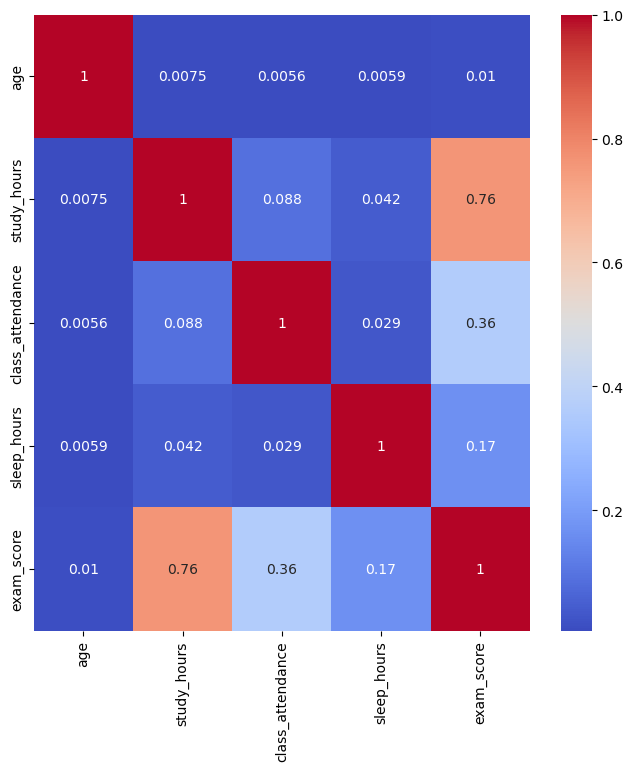

In [7]:
# finding correlation and plotting heatman
plt.figure(figsize=(8, 8))
corr = train[num_cols].corr()   # call the method
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

### some insides
1. Study hours show a strong positive correlation (0.76) with exam scores, making it the most influential feature.

2. Class attendance has a moderate positive correlation (0.36), indicating that regular attendance improves performance.

3. Sleep hours show a weak positive correlation (0.17), suggesting a minor contribution to academic performance.

4. Age has no meaningful correlation (0.01) and does not directly affect exam scores. The relation with the scope can be nonlinear

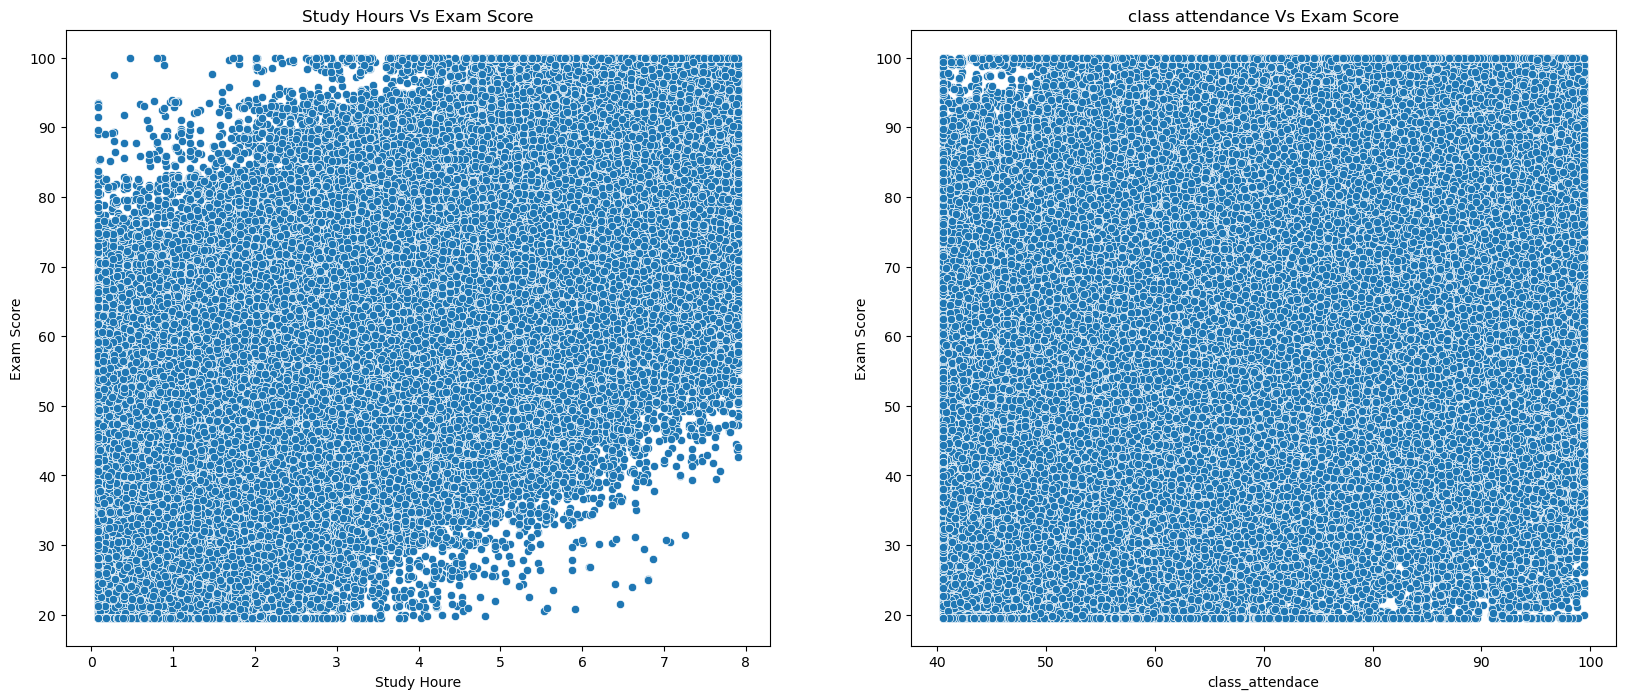

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(data=train, x='study_hours', y='exam_score')
plt.title('Study Hours Vs Exam Score')
plt.xlabel('Study Houre')
plt.ylabel('Exam Score')
plt.subplot(1,2,2)
sns.scatterplot(data=train, x='class_attendance', y='exam_score')
plt.title('class attendance Vs Exam Score')
plt.xlabel('class_attendace')
plt.ylabel('Exam Score')
plt.show()

### insight: 
1. Study hours is a strong and reliable predictor of exam score. The relationship is approximately linear and suitable for linear regression. this explain the correaltion 0.76
2. Attendance has a weak and noisy relationship with exam score and does not show a strong linear trend.Its effect may be indirect or dependent on other variables

In [9]:
train.age.unique()

array([21, 18, 20, 19, 23, 24, 22, 17])

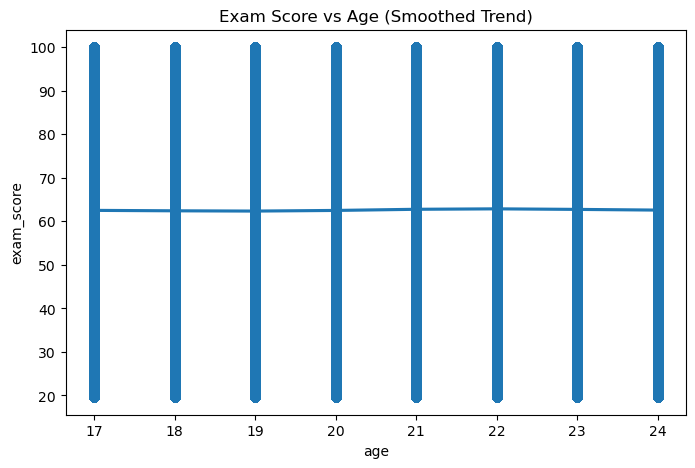

In [10]:
plt.figure(figsize=(8,5))
sns.regplot(data=train, x='age', y='exam_score', lowess=True)
plt.title("Exam Score vs Age (Smoothed Trend)")
plt.show()

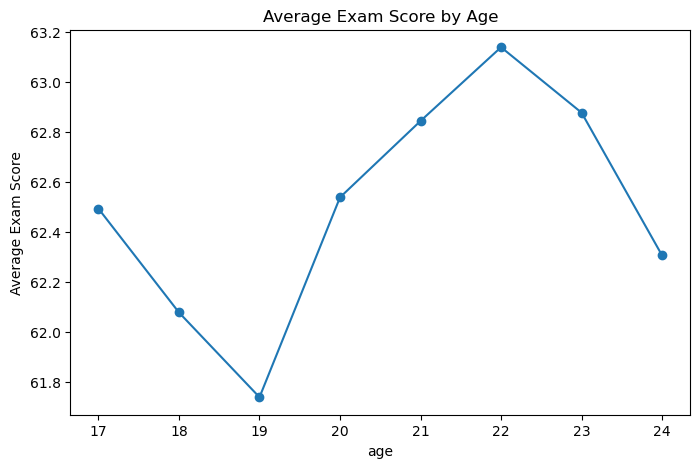

In [11]:
age_trend = train.groupby('age')['exam_score'].mean()

plt.figure(figsize=(8,5))
age_trend.plot(marker='o')
plt.ylabel("Average Exam Score")
plt.title("Average Exam Score by Age")
plt.show()


light dip around age 19
Slight peak around age 22
Then a small drop
But the total range is only about 1.4 points (61.7 → 63.1)

**That is extremely small compared to:**
score range: 20 → 100
std of scores: ~19
So statistically, this variation is negligible.

In [6]:
# Without age
X_no_age = train[['study_hours', 'class_attendance', 'sleep_hours']]
y = train['exam_score']

# With age
X_with_age = train[['age', 'study_hours', 'class_attendance', 'sleep_hours']]

# Split both
X_train_no_age, X_test_no_age, y_train, y_test = train_test_split(
    X_no_age, y, test_size=0.2, random_state=42
)

X_train_age, X_test_age, _, _ = train_test_split(
    X_with_age, y, test_size=0.2, random_state=42
)

In [7]:
# linear model with age 
lr_age = LinearRegression()
lr_age.fit(X_train_age, y_train)
y_pred_lr_age = lr_age.predict(X_test_age)

In [8]:
# linear without age
lr_no_age = LinearRegression()
lr_no_age.fit(X_train_no_age, y_train)
y_pred_lr_no_age = lr_no_age.predict(X_test_no_age)

In [15]:
for col in cat_cols:
    print(f"\n{col} distribution:")
    print(train[col].value_counts(normalize=True))


gender distribution:
gender
other     0.335075
male      0.334275
female    0.330651
Name: proportion, dtype: float64

course distribution:
course
b.tech     0.208311
b.sc       0.177070
b.com      0.176083
bca        0.140827
bba        0.120070
ba         0.098395
diploma    0.079244
Name: proportion, dtype: float64

internet_access distribution:
internet_access
yes    0.919719
no     0.080281
Name: proportion, dtype: float64

sleep_quality distribution:
sleep_quality
poor       0.339167
good       0.338237
average    0.322597
Name: proportion, dtype: float64

study_method distribution:
study_method
coaching         0.209043
self-study       0.208144
mixed            0.195375
group study      0.195252
online videos    0.192186
Name: proportion, dtype: float64

facility_rating distribution:
facility_rating
medium    0.339813
low       0.337108
high      0.323079
Name: proportion, dtype: float64

exam_difficulty distribution:
exam_difficulty
moderate    0.561876
easy        0.280222
h

In [9]:
for col in cat_cols:
    print(f"\nAverage exam score by {col}:")
    print(train.groupby(col)['exam_score'].mean().sort_values(ascending=False))



Average exam score by gender:
gender
other     62.781191
female    62.563220
male      62.175561
Name: exam_score, dtype: float64

Average exam score by course:
course
bba        63.232038
bca        62.586227
b.com      62.537726
b.tech     62.519707
diploma    62.404354
b.sc       62.295491
ba         61.886931
Name: exam_score, dtype: float64

Average exam score by internet_access:
internet_access
yes    62.509172
no     62.478038
Name: exam_score, dtype: float64

Average exam score by sleep_quality:
sleep_quality
good       67.884885
average    62.662000
poor       56.995470
Name: exam_score, dtype: float64

Average exam score by study_method:
study_method
coaching         69.266665
mixed            65.101735
group study      60.531838
online videos    59.727607
self-study       57.700155
Name: exam_score, dtype: float64

Average exam score by facility_rating:
facility_rating
high      66.707126
medium    63.028954
low       57.954546
Name: exam_score, dtype: float64

Average exam

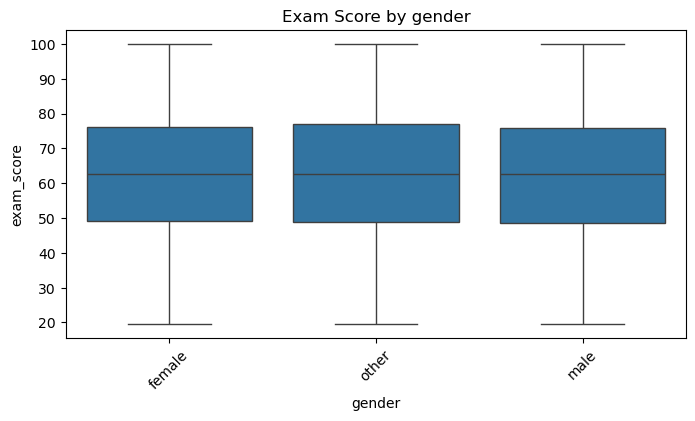

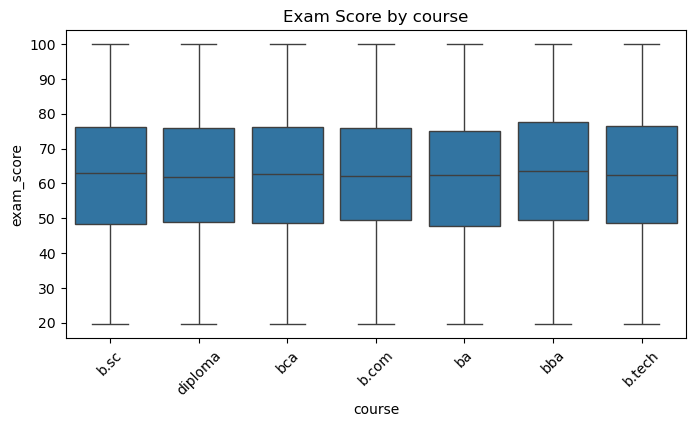

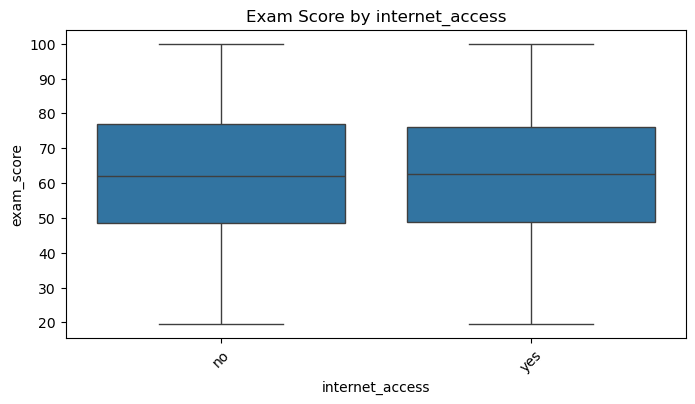

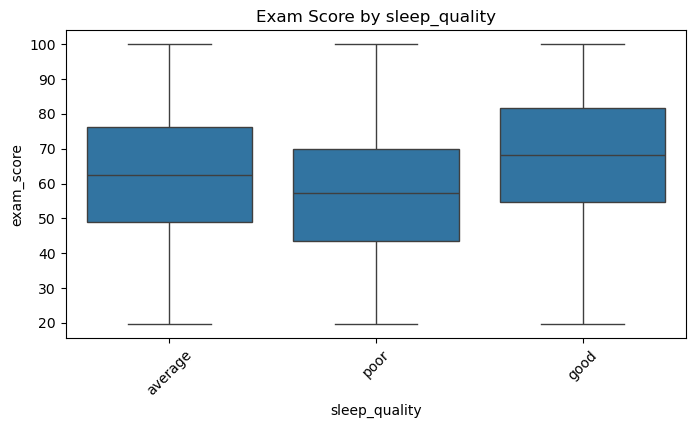

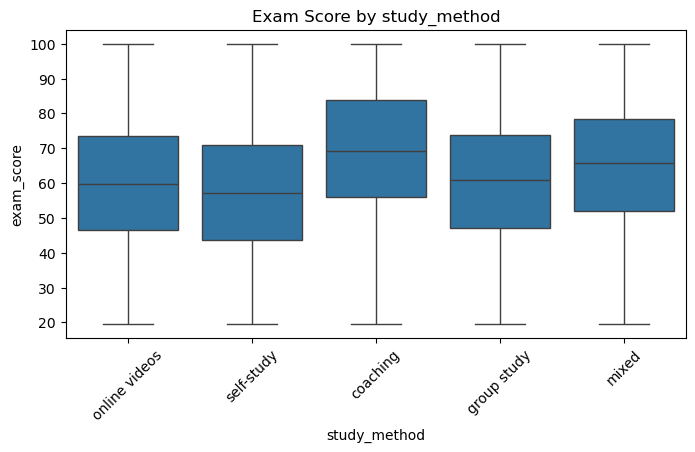

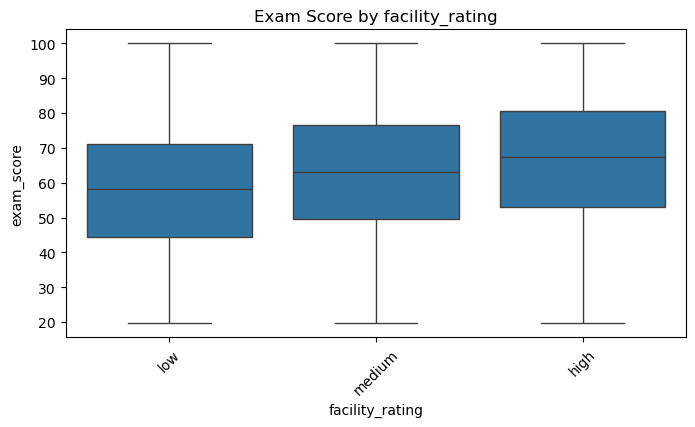

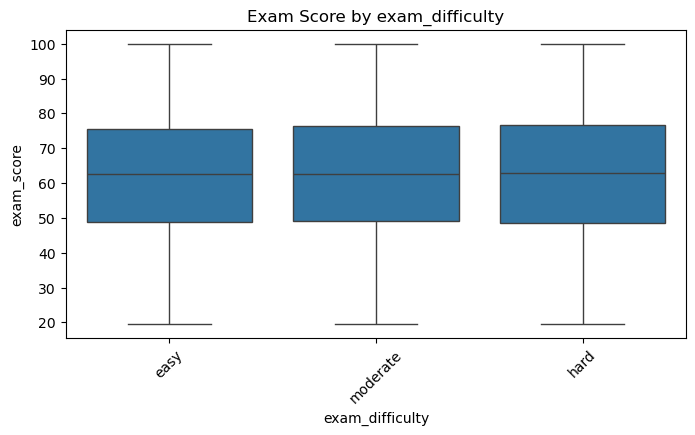

In [17]:

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=train, x=col, y='exam_score')
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.show()


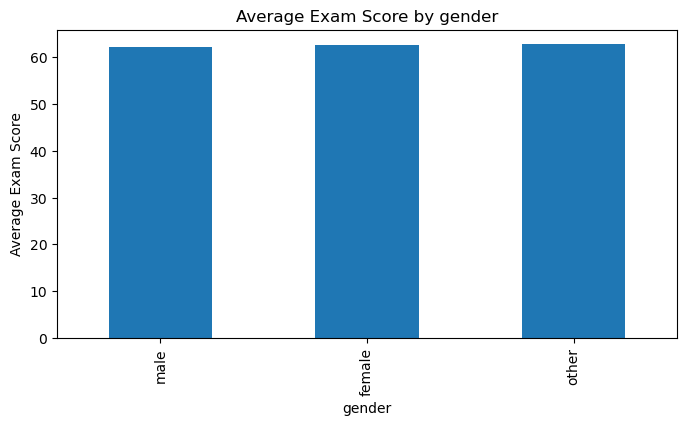

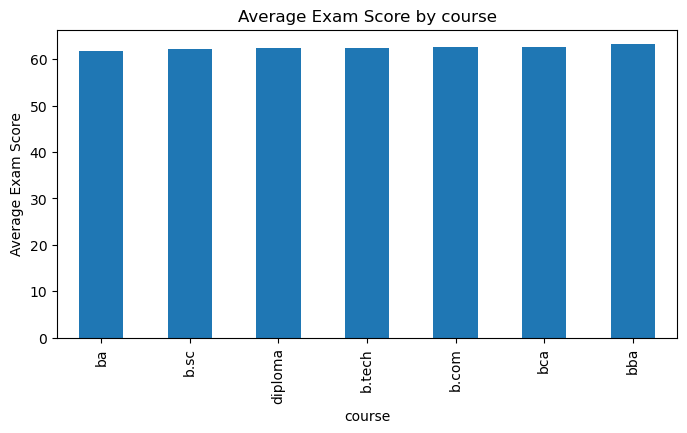

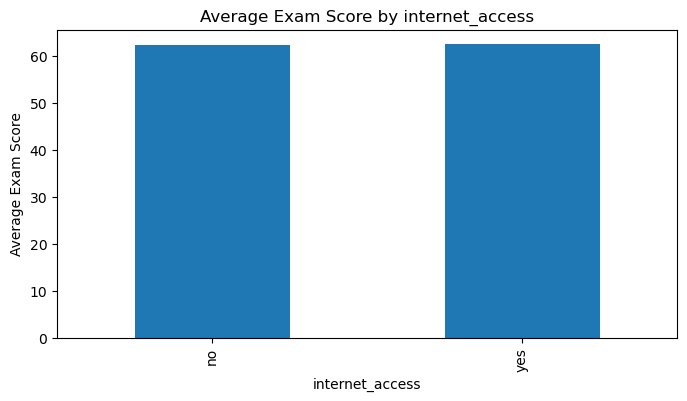

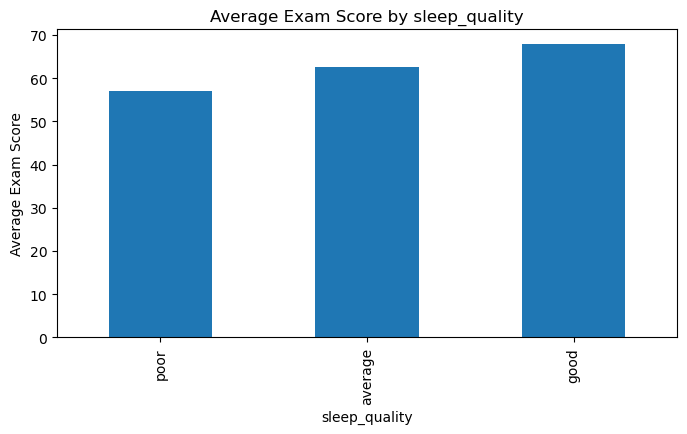

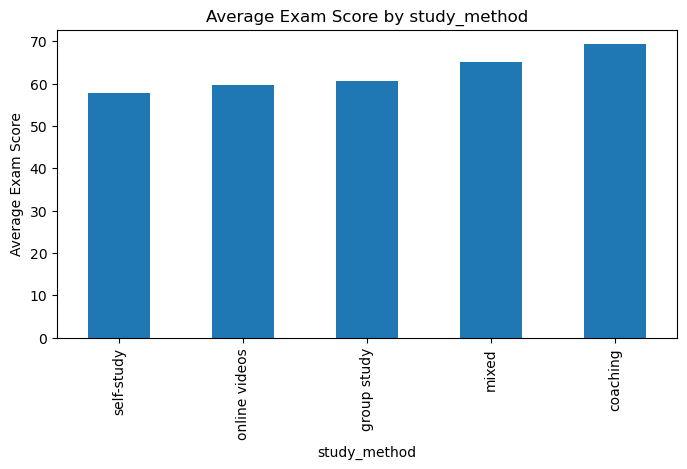

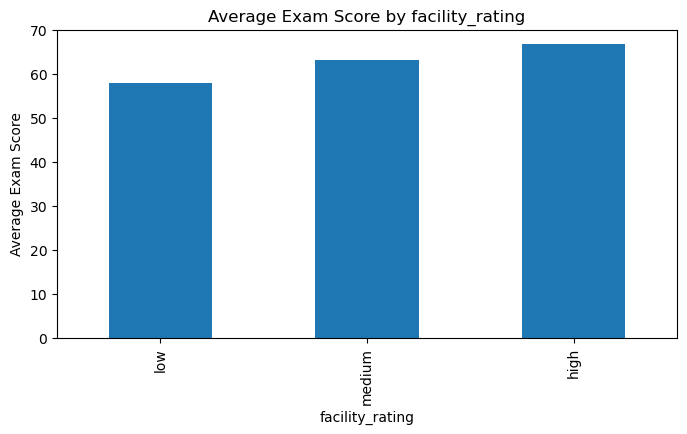

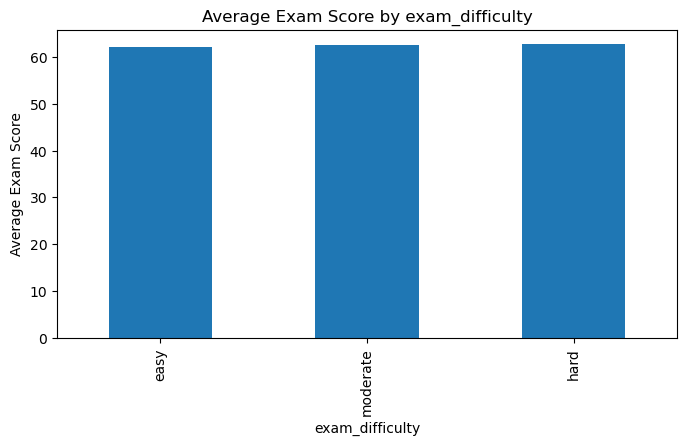

In [18]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    train.groupby(col)['exam_score'].mean().sort_values().plot(kind='bar')
    plt.ylabel("Average Exam Score")
    plt.title(f"Average Exam Score by {col}")
    plt.show()


In [14]:
import scipy.stats as stats

groups = [group['exam_score'].values for name, group in train.groupby('gender')]
stats.f_oneway(*groups)


F_onewayResult(statistic=np.float64(55.42793181106683), pvalue=np.float64(8.512805514262938e-25))

In [10]:
num_features = ['study_hours', 'class_attendance', 'sleep_hours']
cat_features = cat_cols   # your categorical columns

X = train[num_features + cat_features]
y = train['exam_score']

In [11]:
X = pd.get_dummies(X, drop_first=True)


,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,7.91,98.8,4.9,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,4.95,94.8,4.7,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,True
2,4.68,92.6,5.8,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,2.00,49.5,8.3,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,7.65,86.9,9.6,True,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [12]:
X = X.astype(int)
X.head()

,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,7,98,4,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,4,94,4,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,4,92,5,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2,49,8,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,7,86,9,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(
        n_estimators=100,   # reduce from 300
        max_depth=15,      # limit depth
        n_jobs=-1,         # use all cores
        random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100)
}

for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(name, "R2:", score)


Linear R2: 0.7715465159806666
Ridge R2: 0.7715465161605024


In [ ]:
model = RandomForestRegressor(
    n_estimators=300,
    n_jobs=-1,        # use all CPU cores
    random_state=42
)
cross_val_score(model, X, y, cv=3, scoring='r2', n_jobs=-1)


In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",   # very fast
    random_state=42
)

score = cross_val_score(
    xgb, X, y,
    cv=3, scoring='r2', n_jobs=-1
).mean()

print("XGBoost R2:", score)


XGBoost R2: 0.7747038161373198


# Imporvement in linearRegression Model